### Modelo_uno.

    - Desbalanceo del target - Seguro de Hogar



In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pylab import rcParams
#from imblearn.under_sampling import NearMiss
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.combine import SMOTETomek

In [146]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/cleanned_data/df.tfm')

In [147]:
df.head(2)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0


In [148]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

### Vemos el porcentaje de clientes que tienen contratado el seguro de hogar.  El total es el 15% por lo que esta muy desbalanceado.

In [149]:
clase_hogar = df['lp_seg_hogar'].value_counts()
clase_hogar

0    392563
1     58811
Name: lp_seg_hogar, dtype: int64

% clientes que tienen seguro hogar =  0.14981289627397387


Text(0, 0.5, 'Numero Clientes')

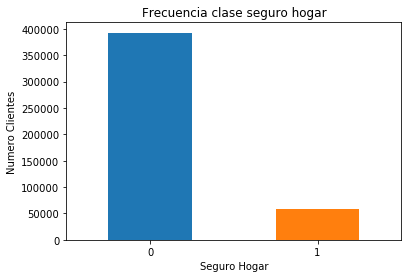

In [150]:
clase_hogar.plot(kind = 'bar', rot = 0)
frecuencia = clase_hogar[1]/clase_hogar[0]
print ('% clientes que tienen seguro hogar = ', frecuencia)
plt.title("Frecuencia clase seguro hogar")
plt.xlabel('Seguro Hogar')
plt.ylabel('Numero Clientes')

### Opciones para el desbalanceo :

    - PARAMETRO WEIGTH parametro weigth = 'balanced'   ESTE ES EL QUE HACEMOS
    - Reducir data set
    - Agregar de forma artifical datos de 1
    

In [151]:
datos_numericos = df.select_dtypes('number')
X = datos_numericos.drop(['lp_seg_hogar'],1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 8576106 (451374, 19)
Datos y = 451374 (451374,)


In [162]:
# recordar porque he utilizado el solver y class_weigth
modelo1 = LogisticRegression(solver='newton-cg', class_weight='balanced')

In [163]:
modelo1.fit(X,y)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [164]:
modelo1.predict(X)

array([1, 1, 1, ..., 0, 0, 0])

In [165]:
# recordar porque he utilizado seed 7 en random_state
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [166]:
modelo1.fit(X_train,y_train)

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [167]:
modelo1.predict(X_test)

array([0, 1, 1, ..., 1, 1, 0])

[[52721 25769]
 [ 2907  8878]]


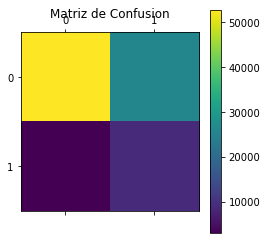

In [168]:
# Imprimimos matriz de confusion para ver los datos iniciales y luego sacar las metricas
matriz_confusion_modelo1 = confusion_matrix(y_test,modelo1.predict(X_test))
print(matriz_confusion_modelo1)
pl.matshow(confusion_matrix(y_test,modelo1.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [159]:
print('====================================')
print ('accuracy_score = ', accuracy_score(y_test,modelo1.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,modelo1.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,modelo1.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,modelo1.predict(X_test)))
print('====================================')
print('classification_report')
print(classification_report(y_test, modelo1.predict(X_test)))

accuracy_score =  0.6823483799501523
precision = 0.25624152163246455
recall = 0.7533305048790836
f1_score = 0.38240868366643693
classification_report
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     78490
           1       0.26      0.75      0.38     11785

   micro avg       0.68      0.68      0.68     90275
   macro avg       0.60      0.71      0.58     90275
weighted avg       0.86      0.68      0.73     90275

